In [35]:
import loader
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [32]:
result, status, message = loader.loadcsvfile("koi_exoplanets.csv")
if(status == 0):
    raise Exception(message)
print(result)

         kepid kepoi_name   kepler_name         ra  ra_err        ra_str  \
0     10797460  K00752.01  Kepler-227 b  291.93423     0.0  19h27m44.22s   
1     10797460  K00752.02  Kepler-227 c  291.93423     0.0  19h27m44.22s   
2     10811496  K00753.01           NaN  297.00482     0.0  19h48m01.16s   
3     10848459  K00754.01           NaN  285.53461     0.0  19h02m08.31s   
4     10854555  K00755.01  Kepler-664 b  288.75488     0.0  19h15m01.17s   
...        ...        ...           ...        ...     ...           ...   
9559  10090151  K07985.01           NaN  297.18875     0.0  19h48m45.30s   
9560  10128825  K07986.01           NaN  286.50937     0.0  19h06m02.25s   
9561  10147276  K07987.01           NaN  294.16489     0.0  19h36m39.57s   
9562  10155286  K07988.01           NaN  296.76288     0.0  19h47m03.09s   
9563  10156110  K07989.01           NaN  297.00977     0.0  19h48m02.34s   

            dec  dec_err       dec_str  koi_gmag  ...  koi_fpflag_co  \
0     48.141651

In [33]:
import re

def string_to_ms(texto: str) -> int:
    """
    Convierte un literal de duración como '47d21h15m30.5s' a milisegundos.
    Partes posibles (todas opcionales, pero al menos una debe existir):
      d = días, h = horas, m = minutos, s = segundos (puede ser decimal)
    Orden esperado: d h m s (sin reordenar). Ejemplos válidos:
      '10s', '3m25s', '2h', '1d2h', '4d3h2m1.25s'
    Retorna:
      int: total en milisegundos.
    Lanza:
      ValueError si el formato es inválido.
    """
    patron = re.compile(
        r'^(?:(?P<d>\d+)d)?'
        r'(?:(?P<h>\d+)h)?'
        r'(?:(?P<m>\d+)m)?'
        r'(?:(?P<s>\d+(?:\.\d+)?)s)?$'
    )
    m = patron.match(texto.strip())
    if not m or not any(m.group(g) for g in ('d','h','m','s')):
        raise ValueError(f"Formato inválido: {texto}")
    dias = int(m.group('d')) if m.group('d') else 0
    horas = int(m.group('h')) if m.group('h') else 0
    minutos = int(m.group('m')) if m.group('m') else 0
    segundos = float(m.group('s')) if m.group('s') else 0.0

    total_ms = (
        dias * 86400000 +
        horas * 3600000 +
        minutos * 60000 +
        int(round(segundos * 1000))
    )
    return total_ms

In [37]:
correlation_df = result.drop(columns=['kepler_name', 'kepid', 'kepoi_name', 
                                      'koi_pdisposition', 'koi_disposition', 'koi_comment', 'koi_disp_prov',
                                       'koi_parm_prov', 'koi_sparprov', 'koi_vet_date', 'koi_datalink_dvr',
                                        'koi_datalink_dvs', 'koi_quarters', 'koi_fittype', 'koi_trans_mod',
                                         'koi_model_dof', 'koi_delivname', 'koi_vet_stat', 'koi_limbdark_mod',
                                         'koi_sparprov', 'koi_tce_delivname'])
# Elimina todas las columnas de literales de duración que terminan en _str
for col in correlation_df.columns:
    if col.endswith('_str'):
        correlation_df = correlation_df.drop(columns=[col])
correlation_df = correlation_df.loc[:, correlation_df.nunique() > 1]
correlation_table = correlation_df.corr()
print(correlation_table)

                      ra       dec  koi_gmag  koi_rmag  koi_imag  koi_zmag  \
ra              1.000000 -0.014373 -0.004074  0.006324 -0.002310 -0.006390   
dec            -0.014373  1.000000  0.011004  0.014594  0.013391  0.022099   
koi_gmag       -0.004074  0.011004  1.000000  0.986188  0.961318  0.947730   
koi_rmag        0.006324  0.014594  0.986188  1.000000  0.989652  0.984566   
koi_imag       -0.002310  0.013391  0.961318  0.989652  1.000000  0.997416   
...                  ...       ...       ...       ...       ...       ...   
koi_insol_err2 -0.027574  0.014541  0.048517  0.063524  0.076841  0.085924   
koi_srho       -0.013214  0.017910  0.000189 -0.002966 -0.010094 -0.008255   
koi_srho_err1  -0.006410  0.006980  0.039158  0.035072  0.029155  0.020646   
koi_srho_err2   0.015576 -0.025495  0.004857  0.007636  0.014088  0.008660   
koi_score      -0.168666  0.094944  0.054790  0.040237  0.033427  0.046629   

                koi_jmag  koi_jmag_err  koi_hmag  koi_hmag_err 

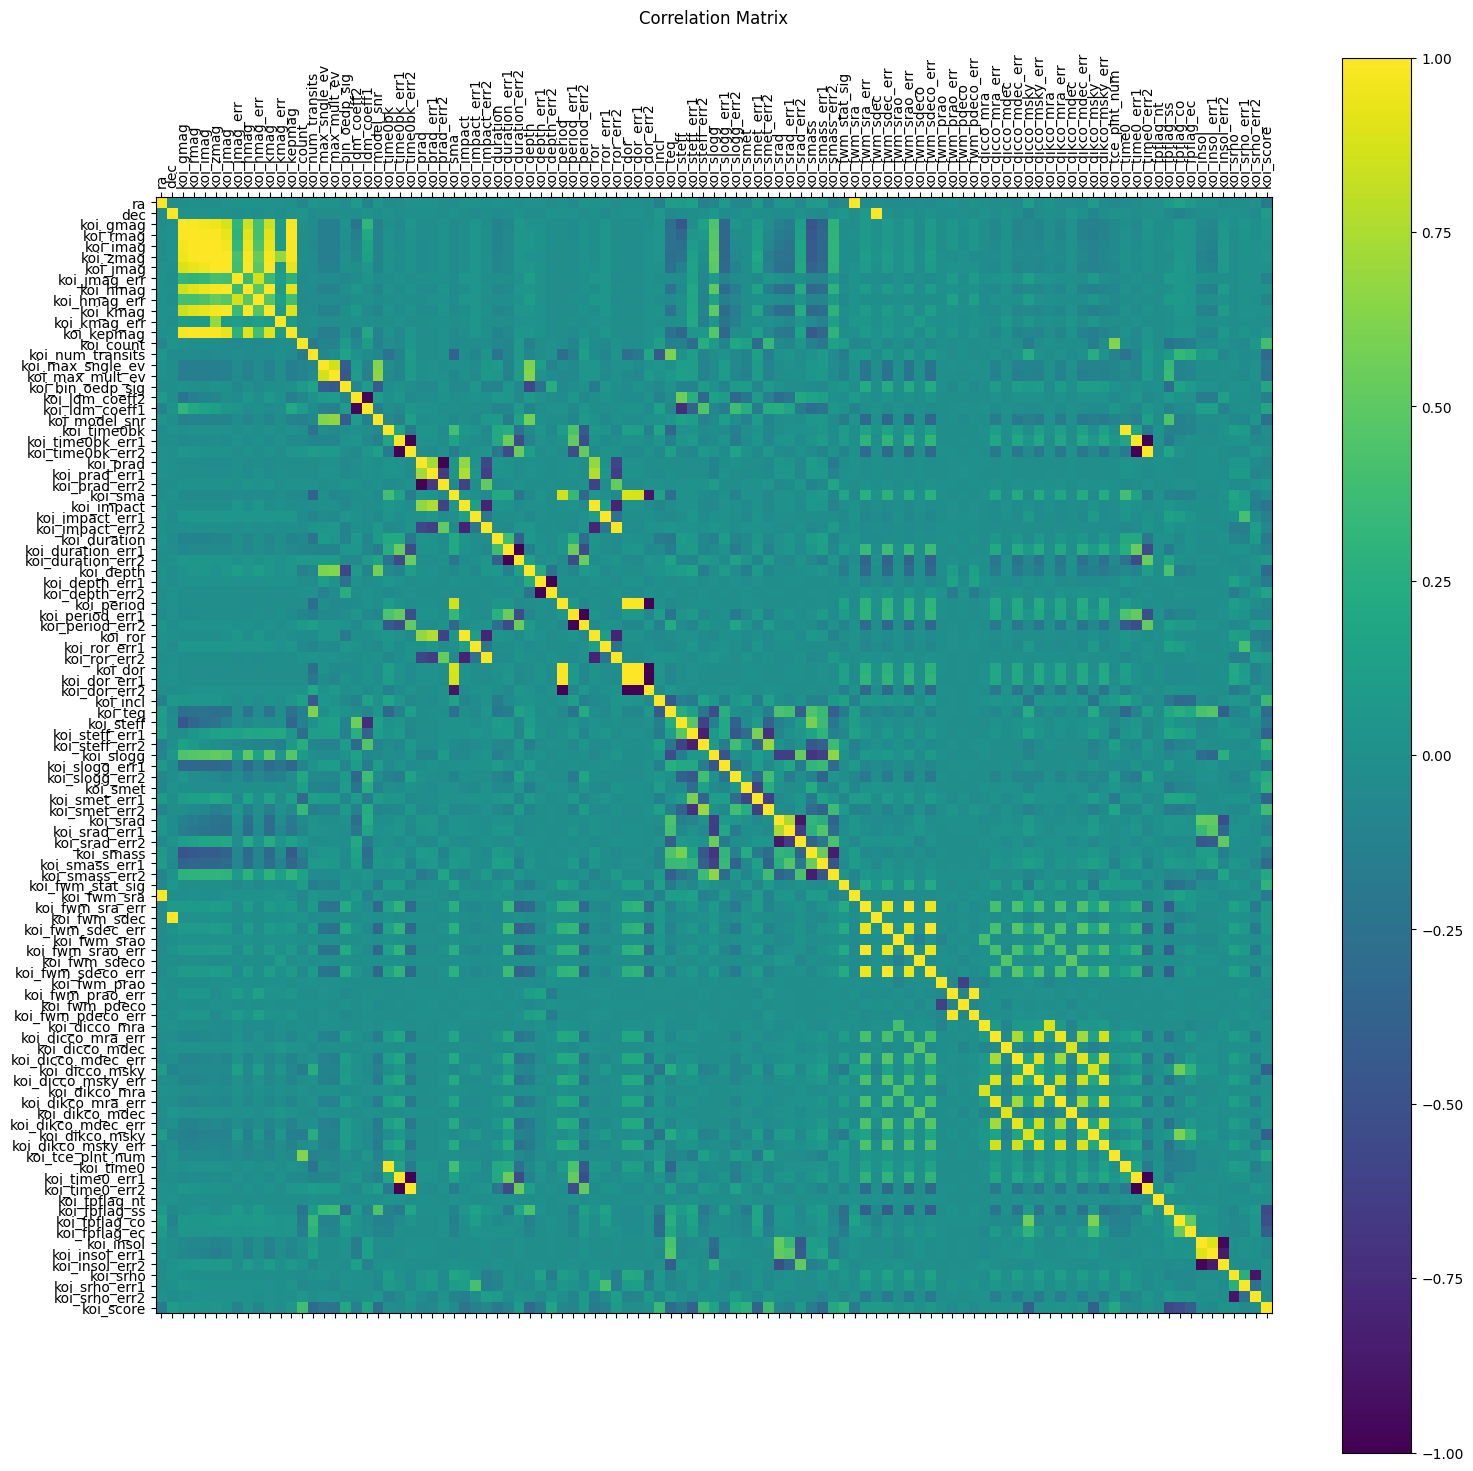

In [39]:
# Make the figure bigger
plt.figure(figsize=(18, 18))

# Plot heatmap
plt.matshow(correlation_table, fignum=1)

# Add colorbar
plt.colorbar()

# Add ticks and labels
plt.xticks(range(len(correlation_table.columns)), correlation_table.columns, rotation=90)
plt.yticks(range(len(correlation_table.columns)), correlation_table.columns)

plt.title("Correlation Matrix", pad=20)
plt.show()


In [5]:
result = result.drop('kepler_name', axis=1)
print(result)

         kepid kepoi_name         ra  ra_err        ra_str        dec  \
0     10797460  K00752.01  291.93423     0.0  19h27m44.22s  48.141651   
1     10797460  K00752.02  291.93423     0.0  19h27m44.22s  48.141651   
2     10811496  K00753.01  297.00482     0.0  19h48m01.16s  48.134129   
3     10848459  K00754.01  285.53461     0.0  19h02m08.31s  48.285210   
4     10854555  K00755.01  288.75488     0.0  19h15m01.17s  48.226200   
...        ...        ...        ...     ...           ...        ...   
9559  10090151  K07985.01  297.18875     0.0  19h48m45.30s  47.093819   
9560  10128825  K07986.01  286.50937     0.0  19h06m02.25s  47.163219   
9561  10147276  K07987.01  294.16489     0.0  19h36m39.57s  47.176281   
9562  10155286  K07988.01  296.76288     0.0  19h47m03.09s  47.145142   
9563  10156110  K07989.01  297.00977     0.0  19h48m02.34s  47.121021   

      dec_err       dec_str  koi_gmag  koi_gmag_err  ...  koi_fpflag_co  \
0         0.0  +48d08m29.9s    15.890           